<a href="https://colab.research.google.com/github/mohammadabid-macad/DesignGrammar_MA_SM_IAAC/blob/main/DesignGrammar_DatasetCreation_BricklayerX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: mount google drive

from google.colab import drive
#!rm -rf /content/drive # remove the directory and it's contents
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cell 1: Install required libraries
#!pip install matplot plotly


In [ ]:
#!pip uninstall -y torch torchaudio torchvision dgl


In [ ]:
!pip install torch==1.13.1 torchvision==0.14.1 torchaudio==0.13.1
!pip install dgl==1.1.3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.0+cu121
    Uninstalling torch-2.4.0+cu121:
      Successfully uninstalled torch-2.4.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.19.0+cu121
    Uninstalling torchvision-0.19.0+cu121:
      Successfully uninstalled torchvision-0.19.0+cu121
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.4.0+

# Step 1: Dataset Creation

In [ ]:
# Cell: Install required libraries (if needed)
!pip install plotly matplotlib

# Cell: Import libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


## Step 1.1: Define Global Parameters and Grid Initialization

In [ ]:
# Cell 1.1: Define Inputs
import random
import numpy as np

number_of_patterns = 10  # Number of different patterns to generate
grid_size = 50  # Default grid size (e.g., 20x20 grid)
brick_type_index = 0  # Selected brick type (0: 2x4, 1: 1x1, 2: 1x2, 3: 1x3, 4: 1x4)

# Dynamic number of insertion points between 10%-20% of total grid size
total_cells = grid_size * grid_size
min_inputs = int(total_cells * 0.01)  # Minimum 10% of total grid cells
max_inputs = int(total_cells * 0.05)  # Maximum 20% of total grid cells

# Brick sizes in grid cells
brick_sizes = [
    (2, 4),  # 2x4 brick
    (1, 1),  # 1x1 brick
    (1, 2),  # 1x2 brick
    (1, 3),  # 1x3 brick
    (1, 4)   # 1x4 brick
]

# Define colors for bricks (RGB format)
brick_colors = [
    [0, 0, 255],  # Blue for 2x4 brick
    [255, 0, 0],  # Red for 1x1 brick
    [0, 255, 0],  # Green for 1x2 brick
    [255, 255, 0],  # Yellow for 1x3 brick
    [255, 0, 255]   # Magenta for 1x4 brick
]

# Initialize grid size
grid_width = grid_size
grid_height = grid_size
total_indices = list(range(grid_width * grid_height))  # All possible grid cell indices


## Step 1.2: Randomize Insertion Points, Primary Module, and Primary Toggle

In [ ]:
# Cell 1.2: Function to generate random insertion points (dynamically based on grid size)
def generate_random_indices():
    """Randomly select insertion point indices based on dynamic number of inputs."""
    number_of_inputs = random.randint(min_inputs, max_inputs)  # Randomly select number of insertion points
    return random.sample(total_indices, number_of_inputs), number_of_inputs


## Step 1.3: Function to Place Bricks on the Grid

In [ ]:
# Cell 1.3: Function to place bricks at a given index
def place_brick(index, brick_type, orientation, cell_colors, occupied_cells):
    """Place a brick of the given type starting at the given index, with a specified orientation."""
    row = index // grid_width
    col = index % grid_width

    # Adjust dimensions based on the orientation (horizontal or vertical)
    if orientation == "horizontal":
        brick_height, brick_width = brick_sizes[brick_type]
    else:  # For vertical orientation, swap height and width
        brick_width, brick_height = brick_sizes[brick_type]

    cells_occupied = []

    # Check if the brick fits within the grid boundaries
    if row + brick_height <= grid_height and col + brick_width <= grid_width:
        for r in range(row, row + brick_height):
            for c in range(col, col + brick_width):
                new_index = r * grid_width + c
                # Ensure the cell is within bounds and not already occupied
                if new_index < len(cell_colors) and new_index not in occupied_cells:
                    cells_occupied.append(new_index)

    # If the brick fits correctly, return the occupied indices
    if len(cells_occupied) == brick_height * brick_width:
        return cells_occupied
    else:
        return []  # Return empty if the brick cannot be placed


## Step 1.4: Fill Remaining Grid Cells

In [ ]:
# Cell 1.4: Revised function to ensure correct brick placement and avoid cell overlap
def fill_remaining_cells(non_selected_indices, cell_colors, occupied_cells, primary_brick_type, pattern_data):
    """Fill the remaining cells with other brick types, ensuring no overlap and correct brick grouping."""
    remaining_brick_types = list(range(len(brick_sizes)))
    remaining_brick_types.remove(primary_brick_type)  # Exclude the primary brick type

    print(f"\nStarting to fill remaining cells for the current pattern...")  # Debug statement

    for index in non_selected_indices:
        if index in occupied_cells:
            continue  # Skip if the cell is already occupied

        # Shuffle remaining brick types to fill the grid randomly
        random.shuffle(remaining_brick_types)
        for brick_type in remaining_brick_types:
            orientation = random.choice(["horizontal", "vertical"])  # Randomly choose orientation
            indices = place_brick(index, brick_type, orientation, cell_colors, occupied_cells)

            # Ensure that brick is valid (correct number of cells) and doesn't overlap with another brick
            if indices and len(indices) == brick_sizes[brick_type][0] * brick_sizes[brick_type][1]:
                overlap_detected = any(cell in occupied_cells for cell in indices)

                # Ensure no overlap
                if not overlap_detected:
                    occupied_cells.update(indices)
                    for i in indices:
                        cell_colors[i] = brick_colors[brick_type]

                    # Store brick information with the correct orientation
                    pattern_data['bricks'].append({
                        'type': f"{brick_sizes[brick_type][0]}x{brick_sizes[brick_type][1]}",
                        'cells': indices,
                        'orientation': orientation,  # Store orientation for secondary bricks
                        'color': brick_colors[brick_type]
                    })

                    # Debug: Print brick placement info
                    print(f"Placed brick: {brick_sizes[brick_type][0]}x{brick_sizes[brick_type][1]}, "
                          f"Orientation: {orientation}, Cells: {indices}")  # Debug statement
                    break

    # Fill any remaining empty cells with 1x1 filler bricks
    for i in range(len(cell_colors)):
        if cell_colors[i] is None and i not in occupied_cells:
            indices = place_brick(i, 1, "horizontal", cell_colors, occupied_cells)  # 1x1 filler bricks always horizontal
            if indices:
                occupied_cells.update(indices)
                for i in indices:
                    cell_colors[i] = brick_colors[1]  # Red for 1x1 brick

                # Store filler brick information
                pattern_data['bricks'].append({
                    'type': "1x1",
                    'cells': indices,
                    'orientation': "horizontal",  # 1x1 bricks are always horizontal in this case
                    'color': brick_colors[1]  # Red
                })

                # Debug: Print filler brick info
                print(f"Placed filler brick (1x1), Cells: {indices}")  # Debug statement

    # Final Debug: Print the total brick info for the current pattern
    print("\nBrick Info for the Current Pattern:")
    for brick in pattern_data['bricks']:
        print(f"Brick Type: {brick['type']}, Orientation: {brick['orientation']}, Cells: {brick['cells']}")


## Cell 1.5: Initialize Dataset and Main Loop for Generating Patterns

In [ ]:
# Cell 1.5: Main loop for generating patterns (with dynamic number of insertion points)
patterns_dataset = []  # Initialize dataset to store information for all patterns

for i in range(number_of_patterns):
    pattern_data = {
        'iteration_id': i,
        'primary_brick_type': None,
        'primary_brick_color': None,
        'selected_insertion_points': [],
        'bricks': [],
        'cell_colors': [None] * (grid_width * grid_height)  # Store the color for each cell
    }

    # Randomly select the primary brick type (exclude 1x1 as primary)
    primary_brick_type = random.choice([0, 2, 3, 4])  # 0: 2x4, 2: 1x2, 3: 1x3, 4: 1x4
    primary_brick_color = brick_colors[primary_brick_type]

    # Generate random insertion points for the primary brick (now dynamic)
    selected_insertion_points, number_of_inputs = generate_random_indices()

    # Update pattern data with primary brick info
    pattern_data['primary_brick_type'] = f"{brick_sizes[primary_brick_type][0]}x{brick_sizes[primary_brick_type][1]}"
    pattern_data['primary_brick_color'] = primary_brick_color
    pattern_data['selected_insertion_points'] = selected_insertion_points

    occupied_cells = set()

    # Place primary bricks at selected insertion points
    for index in selected_insertion_points:
        orientation = random.choice(["horizontal", "vertical"])  # Randomly choose orientation
        indices = place_brick(index, primary_brick_type, orientation, pattern_data['cell_colors'], occupied_cells)
        if indices:
            occupied_cells.update(indices)
            for i in indices:
                pattern_data['cell_colors'][i] = primary_brick_color
            pattern_data['bricks'].append({
                'type': f"{brick_sizes[primary_brick_type][0]}x{brick_sizes[primary_brick_type][1]}",
                'cells': indices,
                'orientation': orientation,  # Store the orientation for primary bricks
                'color': primary_brick_color
            })

    # Fill remaining cells with secondary and filler bricks
    non_selected_indices = [idx for idx in total_indices if idx not in selected_insertion_points]
    fill_remaining_cells(non_selected_indices, pattern_data['cell_colors'], occupied_cells, primary_brick_type, pattern_data)

    # Append pattern data to the dataset
    patterns_dataset.append(pattern_data)

    # Check for double-classified cells
    cell_occurrence = {}

    for brick in pattern_data['bricks']:
        for cell in brick['cells']:
            if cell not in cell_occurrence:
                cell_occurrence[cell] = 1
            else:
                cell_occurrence[cell] += 1

    overlapping_cells = [cell for cell, count in cell_occurrence.items() if count > 1]

    if overlapping_cells:
        print(f"\nWarning: Double-classified cells detected in Iteration ID: {i}")
        print(f"Overlapping cells: {overlapping_cells}")
    else:
        print(f"No overlapping cells detected in Iteration ID: {i}")


Streaming output truncated to the last 5000 lines.
Placed brick: 1x2, Orientation: horizontal, Cells: [2420, 2421]
Placed brick: 1x1, Orientation: horizontal, Cells: [2422]
Placed brick: 1x1, Orientation: vertical, Cells: [2423]
Placed brick: 1x1, Orientation: horizontal, Cells: [2424]
Placed brick: 1x1, Orientation: horizontal, Cells: [2429]
Placed brick: 1x1, Orientation: vertical, Cells: [2431]
Placed brick: 1x2, Orientation: vertical, Cells: [2432, 2482]
Placed brick: 1x1, Orientation: vertical, Cells: [2433]
Placed brick: 1x1, Orientation: vertical, Cells: [2434]
Placed brick: 1x4, Orientation: horizontal, Cells: [2436, 2437, 2438, 2439]
Placed brick: 1x4, Orientation: horizontal, Cells: [2440, 2441, 2442, 2443]
Placed brick: 1x1, Orientation: vertical, Cells: [2445]
Placed brick: 1x1, Orientation: horizontal, Cells: [2450]
Placed brick: 1x1, Orientation: horizontal, Cells: [2452]
Placed brick: 1x1, Orientation: vertical, Cells: [2454]
Placed brick: 1x1, Orientation: horizontal, C

## Cell 1.6: Visualize Random Patterns

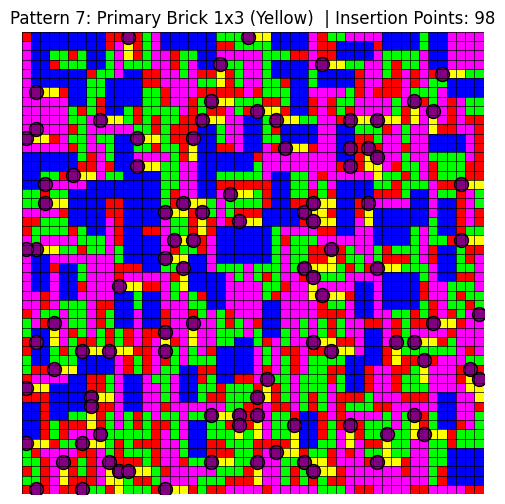

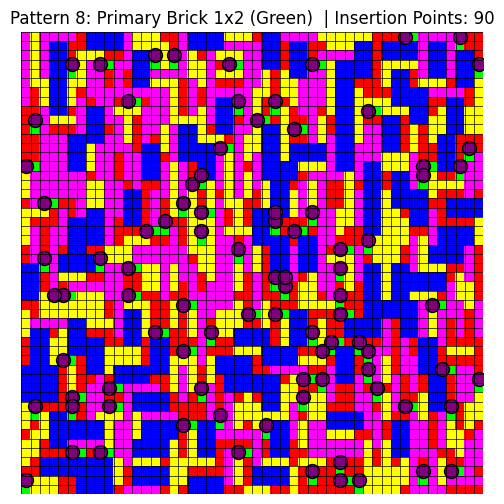

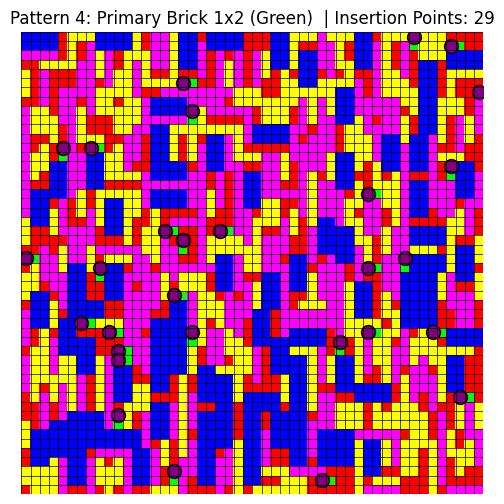

In [ ]:
# Cell 1.6: Visualize Random Patterns with Brick Info, including Brick Colors and Insertion Points
import matplotlib.pyplot as plt

num_visualizations = 3  # Number of patterns to randomly visualize
patterns_to_visualize = random.sample(patterns_dataset, num_visualizations)

# Mapping from color list to color name for better labeling
brick_color_map = {
    (0, 0, 255): 'Blue',      # 2x4 brick
    (255, 0, 0): 'Red',       # 1x1 brick
    (0, 255, 0): 'Green',     # 1x2 brick
    (255, 255, 0): 'Yellow',  # 1x3 brick
    (255, 0, 255): 'Magenta'  # 1x4 brick
}

for pattern in patterns_to_visualize:
    iteration_id = pattern['iteration_id']
    primary_brick_type = pattern['primary_brick_type']
    primary_brick_color = pattern['primary_brick_color']
    selected_indices = pattern['selected_insertion_points']
    cell_colors = pattern['cell_colors']

    # Get the color name from the RGB values for the primary brick
    primary_brick_color_name = brick_color_map.get(tuple(primary_brick_color), 'Unknown')

    # Visualization
    fig, ax = plt.subplots(figsize=(6, 6))

    # Create an empty grid
    grid_image = np.ones((grid_height, grid_width, 3)) * 255  # White background

    # Fill in the cell colors for the specific pattern
    for idx, color in enumerate(cell_colors):
        row = idx // grid_width
        col = idx % grid_width
        if color:
            grid_image[row, col] = color

    ax.imshow(grid_image.astype(np.uint8), extent=(0, grid_width, grid_height, 0))

    # Mark insertion points
    for index in selected_indices:
        row = index // grid_width
        col = index % grid_width
        ax.scatter(col + 0.5, row + 0.5, color='purple', s=100, edgecolor='black')

    # Add grid lines
    for i in range(grid_width + 1):
        ax.plot([i, i], [0, grid_height], color='black', lw=0.5)
    for j in range(grid_height + 1):
        ax.plot([0, grid_width], [j, j], color='black', lw=0.5)

    # Update title to include brick color and number of insertion points
    ax.set_title(f"Pattern {iteration_id}: Primary Brick {primary_brick_type} ({primary_brick_color_name}) "
                 f" | Insertion Points: {len(selected_indices)}")

    ax.axis('off')
    plt.show()


# Step 2: Graph Conversion

## Cell 2.1: Create Empty Grid Graph

In [ ]:
# Cell 2.1: Create Empty Grid Graph
import networkx as nx

def create_empty_grid_graph(grid_width, grid_height):
    """Create an empty grid graph where each node represents the center of a grid cell, and edges connect adjacent cells."""
    G = nx.Graph()

    # Add nodes with their position as attributes
    for row in range(grid_height):
        for col in range(grid_width):
            node_id = row * grid_width + col
            x_center = col + 0.5
            y_center = row + 0.5
            G.add_node(node_id, pos=(x_center, y_center))

    # Add edges between adjacent nodes (horizontally and vertically)
    for row in range(grid_height):
        for col in range(grid_width):
            node_id = row * grid_width + col

            # Horizontal edge (right neighbor)
            if col < grid_width - 1:
                right_neighbor = row * grid_width + (col + 1)
                G.add_edge(node_id, right_neighbor, orientation='horizontal', length=1)

            # Vertical edge (bottom neighbor)
            if row < grid_height - 1:
                bottom_neighbor = (row + 1) * grid_width + col
                G.add_edge(node_id, bottom_neighbor, orientation='vertical', length=1)

    return G

# Create the empty grid graph (reusable for all patterns)
empty_grid_graph = create_empty_grid_graph(grid_width, grid_height)


## Cell 2.2: Convert Pattern Data to Graph

In [ ]:
# Cell 2.2: Convert Pattern-Filled Grid to Graph
def convert_pattern_to_graph(empty_grid_graph, pattern_data):
    """Convert the pattern-filled grid to a graph with nodes and edges carrying brick-specific attributes."""
    G = empty_grid_graph.copy()  # Copy the empty grid graph as a base

    # Add node attributes (brick type, occupied, insertion point) based on the pattern
    for brick in pattern_data['bricks']:
        brick_type = brick['type']
        occupied_cells = brick['cells']

        # Set node attributes for each occupied cell
        for cell in occupied_cells:
            G.nodes[cell]['brick_type'] = brick_type
            G.nodes[cell]['occupied'] = True

    # Set insertion points as a node attribute
    for insertion_point in pattern_data['selected_insertion_points']:
        G.nodes[insertion_point]['insertion_point'] = True

    return G

# Example: Convert a specific pattern to a graph
pattern_graph = convert_pattern_to_graph(empty_grid_graph, patterns_dataset[0])  # Convert first pattern


## Cell 2.3: Extract Subgraphs for Each Brick

In [ ]:
# Cell 2.3: Extract and Store Subgraphs for All Bricks in the Dataset
def extract_and_store_subgraphs(G, pattern_data):
    """Extract subgraphs for each brick in the pattern, ensuring all brick types are captured as one connected subgraph."""
    brick_subgraphs = []
    brick_type_counts = {}

    # Loop over each brick in the pattern
    for i, brick in enumerate(pattern_data['bricks']):
        brick_type = brick['type']  # Get brick type
        brick_cells = brick['cells']  # Get the cells occupied by this brick

        if brick_cells:
            # Create a subgraph for this brick using the cells it occupies
            brick_subgraph = G.subgraph(brick_cells).copy()

            # Ensure all cells are connected (this subgraph should represent one brick)
            if nx.is_connected(brick_subgraph):
                brick_subgraphs.append((brick, brick_subgraph))  # Store the subgraph with its associated brick data

                # Count the bricks by type
                if brick_type not in brick_type_counts:
                    brick_type_counts[brick_type] = 0
                brick_type_counts[brick_type] += 1
            else:
                print(f"Warning: Subgraph for brick type {brick_type} is not connected.")

    # Debugging: Print the number of subgraphs extracted
    if len(brick_subgraphs) > 0:
        print(f"Subgraphs extracted for Pattern {pattern_data['iteration_id']}.")

    # Store subgraph information in pattern_data for feature extraction
    pattern_data['subgraphs'] = brick_subgraphs

    return pattern_data

# Example: Apply this function to the entire patterns dataset
for pattern in patterns_dataset:
    pattern_graph = convert_pattern_to_graph(empty_grid_graph, pattern)
    pattern = extract_and_store_subgraphs(pattern_graph, pattern)

# Verification: Visualization dataset
visualization_dataset = []
for pattern in patterns_dataset:
    visualization_dataset.append({
        'iteration_id': pattern['iteration_id'],  # Use iteration_id as the key
        'primary_brick_type': pattern['primary_brick_type'],
        'primary_brick_color': pattern['primary_brick_color'],
        'bricks': pattern['bricks'],  # Include brick info
        'subgraphs': pattern['subgraphs']  # Include subgraph data
    })

# Print verification for 10 random patterns
import random

def print_verification_info(num_patterns=10):
    """Print a summary of brick types and subgraph information for verification."""
    patterns_to_print = random.sample(visualization_dataset, num_patterns)

    for pattern in patterns_to_print:
        print(f"Iteration ID: {pattern['iteration_id']}")
        brick_type_counts = {}

        # Count the number of bricks by type
        for brick in pattern['bricks']:
            brick_type = brick['type']
            if brick_type not in brick_type_counts:
                brick_type_counts[brick_type] = 0
            brick_type_counts[brick_type] += 1

        # Print the brick type and the number of each type detected
        for brick_type, count in brick_type_counts.items():
            print(f"Brick Type {brick_type}: {count} bricks detected")

        # Debugging: Print the number of subgraphs stored
        print(f"Subgraphs for Pattern {pattern['iteration_id']}: {len(pattern['subgraphs'])} subgraphs found.\n")

# Call the verification print function
print_verification_info(num_patterns=10)


Subgraphs extracted for Pattern 0.
Subgraphs extracted for Pattern 1.
Subgraphs extracted for Pattern 2.
Subgraphs extracted for Pattern 3.
Subgraphs extracted for Pattern 4.
Subgraphs extracted for Pattern 5.
Subgraphs extracted for Pattern 6.
Subgraphs extracted for Pattern 7.
Subgraphs extracted for Pattern 8.
Subgraphs extracted for Pattern 9.
Iteration ID: 5
Brick Type 2x4: 52 bricks detected
Brick Type 1x2: 257 bricks detected
Brick Type 1x3: 155 bricks detected
Brick Type 1x4: 175 bricks detected
Brick Type 1x1: 405 bricks detected
Subgraphs for Pattern 5: 1044 subgraphs found.

Iteration ID: 8
Brick Type 1x2: 86 bricks detected
Brick Type 1x4: 150 bricks detected
Brick Type 1x3: 187 bricks detected
Brick Type 1x1: 511 bricks detected
Brick Type 2x4: 82 bricks detected
Subgraphs for Pattern 8: 1016 subgraphs found.

Iteration ID: 0
Brick Type 1x3: 97 bricks detected
Brick Type 1x2: 279 bricks detected
Brick Type 1x1: 467 bricks detected
Brick Type 1x4: 148 bricks detected
Brick 

## Cell 2.4: Visualize Empty Grid Graph

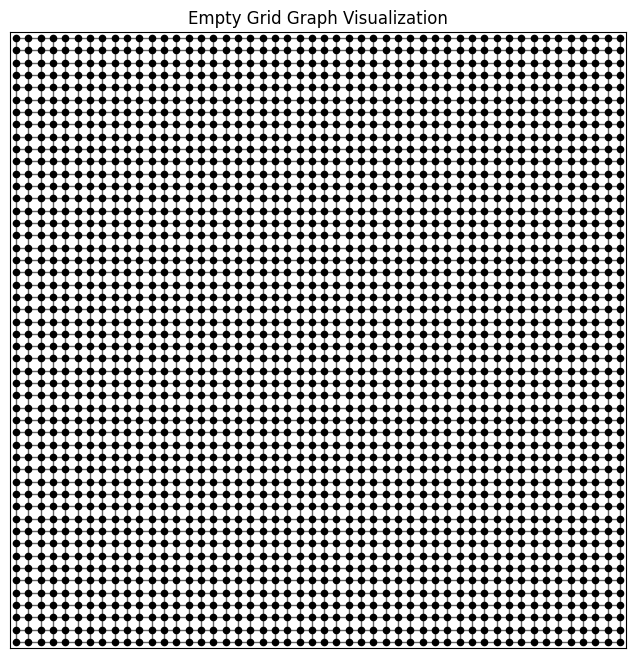

In [ ]:
# Cell 2.4: Visualize Empty Grid Graph
import matplotlib.pyplot as plt

def visualize_empty_grid_graph(G, grid_width, grid_height):
    """Visualize the empty grid graph with nodes and edges overlaid on the grid."""
    pos = nx.get_node_attributes(G, 'pos')  # Get node positions
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot an empty grid in the background
    grid_image = np.ones((grid_height, grid_width, 3)) * 255  # White background
    ax.imshow(grid_image.astype(np.uint8), extent=(0, grid_width, grid_height, 0), alpha=0.2)

    # Draw edges (connections between nodes)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='black', alpha=0.6)

    # Draw nodes (centers of the cells)
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=20, node_color='black')

    ax.set_title('Empty Grid Graph Visualization')
    ax.set_xlim([0, grid_width])
    ax.set_ylim([0, grid_height])
    ax.invert_yaxis()  # Ensure (0,0) is at the top-left corner
    plt.show()

# Visualize the empty grid graph
visualize_empty_grid_graph(empty_grid_graph, grid_width, grid_height)


## Cell 2.5: Visualize Pattern-Filled Graph



Subgraphs extracted for Pattern 8.


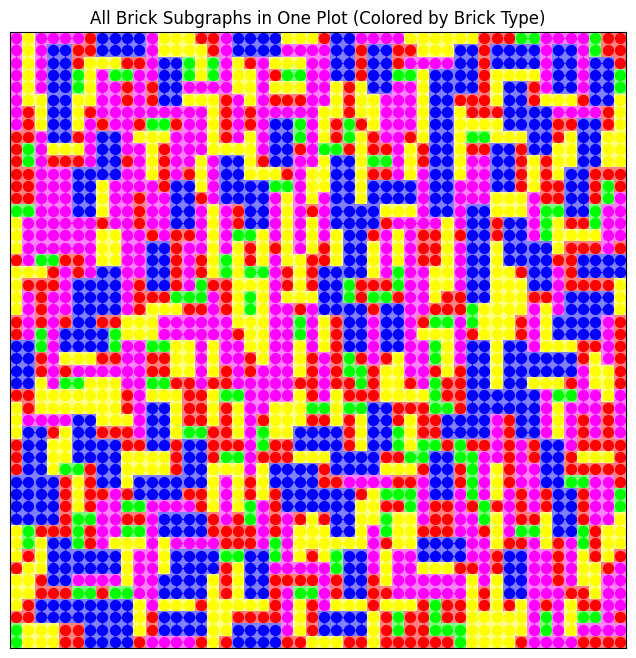


Brick Counts by Type (Color):
Green (1x2): 86 bricks
Magenta (1x4): 150 bricks
Yellow (1x3): 187 bricks
Red (1x1): 511 bricks
Blue (2x4): 82 bricks


In [ ]:
# Cell 2.5: Visualize All Subgraphs in One Plot and Print Brick Counts
import matplotlib.pyplot as plt
import numpy as np

def visualize_all_subgraphs(brick_subgraphs, grid_width, grid_height, cell_colors):
    """Visualize all subgraphs (bricks) for a given pattern in one plot, with nodes and edges colored based on the brick color."""

    fig, ax = plt.subplots(figsize=(8, 8))

    # Initialize brick count by color
    brick_counts_by_color = {}

    # Plot the grid pattern in the background (with lesser opacity)
    grid_image = np.ones((grid_height, grid_width, 3)) * 255  # White background
    for idx, color in enumerate(cell_colors):
        row = idx // grid_width
        col = idx % grid_width
        if color:
            grid_image[row, col] = color
    ax.imshow(grid_image.astype(np.uint8), extent=(0, grid_width, grid_height, 0), alpha=0.5)

    # Loop through each subgraph and plot nodes/edges for each brick
    for i, (brick, subgraph) in enumerate(brick_subgraphs):
        pos = nx.get_node_attributes(subgraph, 'pos')  # Get node positions from the subgraph

        # Convert the RGB color of the brick to a normalized matplotlib color
        brick_color_rgb = np.array(brick['color']) / 255.0

        # Draw edges (connections between nodes in the brick subgraph)
        nx.draw_networkx_edges(subgraph, pos, ax=ax, edge_color=[brick_color_rgb], alpha=0.8)

        # Draw nodes (centers of the cells in the brick subgraph)
        nx.draw_networkx_nodes(subgraph, pos, ax=ax, node_size=50, node_color=[brick_color_rgb])

        # Convert RGB to tuple for counting (so the colors can be used as dictionary keys)
        brick_color_tuple = tuple(brick['color'])
        if brick_color_tuple not in brick_counts_by_color:
            brick_counts_by_color[brick_color_tuple] = 0
        brick_counts_by_color[brick_color_tuple] += 1

    ax.set_title('All Brick Subgraphs in One Plot (Colored by Brick Type)')
    ax.set_xlim([0, grid_width])
    ax.set_ylim([0, grid_height])
    ax.invert_yaxis()  # Ensure (0,0) is at the top-left corner
    plt.show()

    # Print the counts for each brick color
    print("\nBrick Counts by Type (Color):")
    for color, count in brick_counts_by_color.items():
        color_name = None
        if np.allclose(color, [0, 0, 255]):
            color_name = 'Blue (2x4)'
        elif np.allclose(color, [255, 0, 0]):
            color_name = 'Red (1x1)'
        elif np.allclose(color, [0, 255, 0]):
            color_name = 'Green (1x2)'
        elif np.allclose(color, [255, 255, 0]):
            color_name = 'Yellow (1x3)'
        elif np.allclose(color, [255, 0, 255]):
            color_name = 'Magenta (1x4)'

        print(f"{color_name}: {count} bricks")

# Example: Visualize all subgraphs for a randomly selected pattern
random_pattern_index = random.randint(0, len(patterns_dataset) - 1)
pattern_graph = convert_pattern_to_graph(empty_grid_graph, patterns_dataset[random_pattern_index])
brick_subgraphs = extract_and_store_subgraphs(pattern_graph, patterns_dataset[random_pattern_index])['subgraphs']
visualize_all_subgraphs(brick_subgraphs, grid_width, grid_height, patterns_dataset[random_pattern_index]['cell_colors'])


# Step 3: Feature Extraction

## Cell 3.1: Initialize Visualization Container

## Cell 3.2: Node-Level Feature Extraction

Node-Level Features:

    node_id (Integer): Unique identifier for each node.
    brick_type (One-Hot Encoded Vector): Type of brick associated with the node.
    x_pos (Float): X-coordinate position of the node.
    y_pos (Float): Y-coordinate position of the node.
    orientation (One-Hot Encoded Vector): Whether the node is part of a horizontally or vertically oriented brick.
    occupied (Binary): Whether the node is occupied by any brick.
    insertion_point (Binary): Whether the node corresponds to an insertion point.
    is_filler_brick (Binary): Indicates if the node belongs to a filler (1x1) brick.
    eigenvector_centrality (Float): Centrality measure based on node connections.

In [ ]:
!pip install joblib


In [ ]:
import networkx as nx
from joblib import Parallel, delayed
import multiprocessing

# Function to extract node-level features for a single pattern graph
def extract_node_features_for_pattern(G, pattern):
    """Extract node-level features from the pattern graph."""
    node_features = []

    # Calculate eigenvector centrality (fallback to degree centrality if needed)
    try:
        eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500)
    except nx.PowerIterationFailedConvergence:
        eigenvector_centrality = nx.degree_centrality(G)  # Fallback to degree centrality

    for node_id, node_data in G.nodes(data=True):
        # Extract brick type (One-hot encoded)
        brick_type = node_data.get('brick_type', None)

        # One-hot encode brick type
        brick_type_encoded = [0, 0, 0, 0, 0]  # 5 brick types: 2x4, 1x1, 1x2, 1x3, 1x4
        if brick_type == "2x4":
            brick_type_encoded[0] = 1
        elif brick_type == "1x1":
            brick_type_encoded[1] = 1
        elif brick_type == "1x2":
            brick_type_encoded[2] = 1
        elif brick_type == "1x3":
            brick_type_encoded[3] = 1
        elif brick_type == "1x4":
            brick_type_encoded[4] = 1

        # Position (Relative X, Y coordinates)
        position = G.nodes[node_id].get('pos', (0, 0))

        # Orientation (One-hot encoded: horizontal or vertical)
        orientation = node_data.get('orientation', 'horizontal')
        orientation_encoded = [1, 0] if orientation == 'horizontal' else [0, 1]

        # Occupied (Binary)
        occupied = node_data.get('occupied', False)

        # Insertion Point (Binary)
        insertion_point = node_data.get('insertion_point', False)

        # Filler Module (Binary) - Previously "is_red_brick"
        filler_module = 1 if brick_type == "1x1" else 0

        # Eigenvector Centrality (or fallback to degree centrality)
        centrality = eigenvector_centrality.get(node_id, 0)

        # Collect node-level features
        node_feature = {
            'node_id': node_id,
            'brick_type': brick_type_encoded,
            'x_pos': position[0],
            'y_pos': position[1],
            'orientation': orientation_encoded,
            'occupied': int(occupied),
            'insertion_point': int(insertion_point),
            'filler_module': filler_module,
            'eigenvector_centrality': centrality
        }

        node_features.append(node_feature)

    return node_features

# Function to parallelize node feature extraction
def extract_all_node_features_in_parallel(patterns_dataset):
    """Extract node features from all pattern graphs in parallel using joblib."""

    # Number of cores for parallel processing
    num_cores = multiprocessing.cpu_count()

    # Convert each pattern to a graph, extract node features in parallel
    results = Parallel(n_jobs=num_cores)(
        delayed(extract_node_features_for_pattern)(convert_pattern_to_graph(empty_grid_graph, pattern), pattern)
        for pattern in patterns_dataset
    )

    return results

# Example: Extract node features in parallel for all patterns in the dataset
node_features_all_patterns = extract_all_node_features_in_parallel(patterns_dataset)

# Print some sample output
print("Node features for the first pattern:")
print(node_features_all_patterns[0][:5])  # Print the first 5 node features for the first pattern


Node features for the first pattern:
[{'node_id': 0, 'brick_type': [0, 0, 1, 0, 0], 'x_pos': 0.5, 'y_pos': 0.5, 'orientation': [1, 0], 'occupied': 1, 'insertion_point': 0, 'filler_module': 0, 'eigenvector_centrality': 0.0008003201280512205}, {'node_id': 1, 'brick_type': [0, 1, 0, 0, 0], 'x_pos': 1.5, 'y_pos': 0.5, 'orientation': [1, 0], 'occupied': 1, 'insertion_point': 0, 'filler_module': 1, 'eigenvector_centrality': 0.0012004801920768309}, {'node_id': 2, 'brick_type': [0, 0, 0, 0, 1], 'x_pos': 2.5, 'y_pos': 0.5, 'orientation': [1, 0], 'occupied': 1, 'insertion_point': 0, 'filler_module': 0, 'eigenvector_centrality': 0.0012004801920768309}, {'node_id': 3, 'brick_type': [0, 0, 1, 0, 0], 'x_pos': 3.5, 'y_pos': 0.5, 'orientation': [1, 0], 'occupied': 1, 'insertion_point': 0, 'filler_module': 0, 'eigenvector_centrality': 0.0012004801920768309}, {'node_id': 4, 'brick_type': [0, 0, 1, 0, 0], 'x_pos': 4.5, 'y_pos': 0.5, 'orientation': [1, 0], 'occupied': 1, 'insertion_point': 0, 'filler_modu

In [ ]:
# Cell 3.2.2: Visualize Node-Level Features with Plotly (Categorical Brick Type and Orientation)

import plotly.graph_objects as go

def visualize_node_features(pattern_data, node_features, grid_width, grid_height):
    """Visualize node-level features using Plotly, with brick type and orientation displayed as categories."""
    fig = go.Figure()

    # Add nodes (grid cells) to the Plotly figure
    for node in node_features:
        x = node['x_pos']
        y = node['y_pos']
        brick_type = node['brick_type']  # One-hot encoded brick type
        color = "rgba(0, 0, 0, 0)"  # Default transparent color
        brick_type_label = "Unknown"  # Default label for unknown brick type

        # Set the node color and brick type label based on the brick type
        if brick_type[0] == 1:  # 2x4 brick
            color = "rgba(0, 0, 255, 0.7)"  # Blue
            brick_type_label = "2x4 Brick"
        elif brick_type[1] == 1:  # 1x1 brick
            color = "rgba(255, 0, 0, 0.7)"  # Red
            brick_type_label = "1x1 Brick"
        elif brick_type[2] == 1:  # 1x2 brick
            color = "rgba(0, 255, 0, 0.7)"  # Green
            brick_type_label = "1x2 Brick"
        elif brick_type[3] == 1:  # 1x3 brick
            color = "rgba(255, 255, 0, 0.7)"  # Yellow
            brick_type_label = "1x3 Brick"
        elif brick_type[4] == 1:  # 1x4 brick
            color = "rgba(255, 0, 255, 0.7)"  # Magenta
            brick_type_label = "1x4 Brick"

        # Orientation (as a readable label)
        orientation_label = "Horizontal" if node['orientation'][0] == 1 else "Vertical"

        # Add hover information (node-level features with brick type and orientation)
        hover_text = f"Node ID: {node['node_id']}<br>" \
                     f"Position: ({x:.2f}, {y:.2f})<br>" \
                     f"Brick Type: {brick_type_label}<br>" \
                     f"Orientation: {orientation_label}<br>" \
                     f"Occupied: {node['occupied']}<br>" \
                     f"Insertion Point: {node['insertion_point']}<br>" \
                     f"Filler Module: {node['filler_module']}<br>" \
                     f"Eigenvector Centrality: {node['eigenvector_centrality']:.4f}"

        fig.add_trace(go.Scatter(
            x=[x], y=[y], mode='markers',
            marker=dict(size=7, color=color, line=dict(width=1, color='black')),
            hoverinfo='text',
            text=hover_text
        ))

    # Update layout to make the grid visible
    fig.update_layout(
        title=f"Node-Level Features Visualization",
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False),
        height=600, width=600,
        xaxis_range=[0, grid_width],
        yaxis_range=[0, grid_height],
        yaxis_autorange="reversed"  # Ensure (0,0) is at the top-left corner
    )

    fig.show()

# Example: Visualize node features for one of the patterns
random_pattern = random.choice(patterns_dataset)
pattern_graph = convert_pattern_to_graph(empty_grid_graph, random_pattern)
node_features = extract_node_features_for_pattern(pattern_graph, random_pattern)

# Visualize the node-level features
visualize_node_features(random_pattern, node_features, grid_width, grid_height)


## Cell 3.3: Edge-Level Feature Extraction [Redundant as of now]

Edge-Level Features:

    node_u and node_v (Integers): The nodes connected by the edge.
    connectivity (Binary): Whether the two nodes are connected in the graph.
    orientation_match (Binary): Whether the orientations of the bricks connected by the edge match.

In [ ]:
# Cell 3.3.1: Edge-Level Feature Extraction (Storing in Dataset)

def extract_edge_features(G):
    """Extract edge-level features from the pattern graph."""
    edge_features = []

    for u, v, edge_data in G.edges(data=True):
        # Connectivity is inherent since the edge exists
        connectivity = 1  # All existing edges are considered connected

        # Orientation Match (if both nodes have the same orientation)
        u_orientation = G.nodes[u].get('orientation', [1, 0])  # Default to horizontal if missing
        v_orientation = G.nodes[v].get('orientation', [1, 0])  # Default to horizontal if missing
        orientation_match = 1 if u_orientation == v_orientation else 0

        # Add edge-level features to the list
        edge_feature = {
            'node_u': u,
            'node_v': v,
            'connectivity': connectivity,
            'orientation_match': orientation_match
        }

        edge_features.append(edge_feature)

    return edge_features

# Example: Extract edge features for all patterns
for pattern in patterns_dataset:
    pattern_graph = convert_pattern_to_graph(empty_grid_graph, pattern)
    edge_features = extract_edge_features(pattern_graph)


In [ ]:
# Cell 3.3.2: Visualize Edge-Level Features with Correct Brick Colors from Nodes

def visualize_edge_features_with_correct_brick_colors(G, edge_features, grid_width, grid_height):
    """Visualize edge-level features using Plotly, with edges colored based on the brick type of the connected nodes."""
    fig = go.Figure()

    # Add edges to the Plotly figure
    for edge in edge_features:
        u = edge['node_u']
        v = edge['node_v']
        u_pos = G.nodes[u]['pos']
        v_pos = G.nodes[v]['pos']

        # Get the brick types of nodes 'u' and 'v'
        u_brick_type = G.nodes[u].get('brick_type', None)
        v_brick_type = G.nodes[v].get('brick_type', None)

        # Determine the color based on the brick type of node 'u'
        color = "rgba(0, 0, 0, 0.5)"  # Default to black/gray if brick type is unknown

        # Check if the brick types of 'u' and 'v' match, and color accordingly
        if u_brick_type == v_brick_type:
            if u_brick_type == [1, 0, 0, 0, 0]:  # 2x4 brick (blue)
                color = "rgba(0, 0, 255, 0.8)"
            elif u_brick_type == [0, 1, 0, 0, 0]:  # 1x1 brick (red)
                color = "rgba(255, 0, 0, 0.8)"
            elif u_brick_type == [0, 0, 1, 0, 0]:  # 1x2 brick (green)
                color = "rgba(0, 255, 0, 0.8)"
            elif u_brick_type == [0, 0, 0, 1, 0]:  # 1x3 brick (yellow)
                color = "rgba(255, 255, 0, 0.8)"
            elif u_brick_type == [0, 0, 0, 0, 1]:  # 1x4 brick (magenta)
                color = "rgba(255, 0, 255, 0.8)"
        else:
            # If the brick types of 'u' and 'v' are different, use a fallback color (gray)
            color = "rgba(128, 128, 128, 0.8)"

        # Connectivity (binary, always 1 for connected edges)
        connectivity = edge['connectivity']

        # Orientation Match (binary)
        orientation_match = edge['orientation_match']

        # Set hover text for the edge
        hover_text = f"Edge: {u} ↔ {v}<br>" \
                     f"Connectivity: {connectivity}<br>" \
                     f"Orientation Match: {orientation_match}"

        # Plot the edge as a line connecting the two nodes
        fig.add_trace(go.Scatter(
            x=[u_pos[0], v_pos[0]], y=[u_pos[1], v_pos[1]],
            mode='lines',
            line=dict(color=color, width=3),
            hoverinfo='text',
            text=hover_text
        ))

    # Add node positions as markers (optional to see the nodes with edges)
    for node_id, node_data in G.nodes(data=True):
        x, y = node_data['pos']
        fig.add_trace(go.Scatter(
            x=[x], y=[y], mode='markers',
            marker=dict(size=5, color='rgba(0, 0, 0, 0.5)'),
            hoverinfo='skip'  # Skip hover on nodes (only edges have hover info)
        ))

    # Update layout to make the grid visible
    fig.update_layout(
        title=f"Edge-Level Features Visualization (Colored by Brick Type)",
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False),
        height=600, width=600,
        xaxis_range=[0, grid_width],
        yaxis_range=[0, grid_height],
        yaxis_autorange="reversed"  # Ensure (0,0) is at the top-left corner
    )

    fig.show()

# Example: Visualize edge features with correct brick colors for one of the patterns
random_pattern = random.choice(patterns_dataset)
pattern_graph = convert_pattern_to_graph(empty_grid_graph, random_pattern)
edge_features = extract_edge_features(pattern_graph)
visualize_edge_features_with_correct_brick_colors(pattern_graph, edge_features, grid_width, grid_height)


## Cell 3.4: Subgraph-Level Feature Extraction

Subgraph-Level Features:

    brick_type (Categorical): The type of brick the subgraph represents.
    num_cells (Integer): The number of cells (nodes) the subgraph occupies.
    orientation (Categorical): The orientation (horizontal/vertical) of the subgraph.
    completeness (Binary): Whether the subgraph is complete or a filler.
    cells (List of Integers): The cells (node IDs) that form the subgraph.

In [ ]:
# Cell 3.4.1: Subgraph-Level Feature Extraction (Updated to ensure correct orientation extraction)
def extract_subgraph_features(G, pattern_data):
    """Extract subgraph-level features (brick-level) from the pattern graph and mark incompleteness based on 1x1 bricks."""
    subgraph_features = []
    incomplete_subgraph_count = 0  # Initialize a counter for incomplete subgraphs (1x1 bricks)

    # Ensure subgraphs exist in the pattern data
    if 'subgraphs' not in pattern_data or len(pattern_data['subgraphs']) == 0:
        print(f"Error: No subgraphs found in the pattern data for Pattern ID: {pattern_data.get('iteration_id', 'Unknown')}")
        return subgraph_features, incomplete_subgraph_count

    print(f"Subgraphs found for Pattern {pattern_data['iteration_id']}: {len(pattern_data['subgraphs'])} subgraphs")

    # Loop over the stored subgraphs for the pattern and extract features
    for brick, subgraph in pattern_data['subgraphs']:
        # Extracting brick type, cells, and orientation directly from pattern_data['bricks']
        brick_type = brick['type']
        cells = brick['cells']
        orientation = brick['orientation']  # Correctly use the stored orientation from pattern_data

        # Mark the subgraph as incomplete if it's a 1x1 brick
        if brick_type == "1x1":
            completeness = 0  # Incomplete (represented by 0)
            incomplete_subgraph_count += 1  # Increment the counter for incomplete subgraphs
        else:
            completeness = 1  # Complete

        # Store the subgraph-level features
        subgraph_feature = {
            'brick_type': brick_type,
            'num_cells': len(cells),
            'orientation': orientation,
            'completeness': completeness,
            'cells': cells  # Ensure cells are captured
        }

        subgraph_features.append(subgraph_feature)

    return subgraph_features, incomplete_subgraph_count

# Example: Extract subgraph features for each pattern, with incomplete subgraph count and minimal log output
for pattern in patterns_dataset:  # Ensure this is the dataset updated in Step 2.3
    print(f"\n--- Processing Pattern ID: {pattern['iteration_id']} ---")
    pattern_graph = convert_pattern_to_graph(empty_grid_graph, pattern)

    # Ensure graph was created correctly
    print(f"Pattern graph has {len(pattern_graph.nodes)} nodes and {len(pattern_graph.edges)} edges.")

    # Extract subgraph features and count incomplete subgraphs
    subgraph_features, incomplete_subgraph_count = extract_subgraph_features(pattern_graph, pattern)

    # Print summary of extracted subgraph features and incomplete subgraphs
    if subgraph_features:
        print(f"Subgraph features extracted for Pattern ID: {pattern['iteration_id']} (Total: {len(subgraph_features)} subgraphs).")
        print(f"Incomplete subgraphs (1x1) detected for Pattern ID: {pattern['iteration_id']}: {incomplete_subgraph_count}")
    else:
        print(f"No subgraph features extracted for Pattern ID: {pattern['iteration_id']}")



--- Processing Pattern ID: 0 ---
Pattern graph has 2500 nodes and 4900 edges.
Subgraphs found for Pattern 0: 1065 subgraphs
Subgraph features extracted for Pattern ID: 0 (Total: 1065 subgraphs).
Incomplete subgraphs (1x1) detected for Pattern ID: 0: 467

--- Processing Pattern ID: 1 ---
Pattern graph has 2500 nodes and 4900 edges.
Subgraphs found for Pattern 1: 1062 subgraphs
Subgraph features extracted for Pattern ID: 1 (Total: 1062 subgraphs).
Incomplete subgraphs (1x1) detected for Pattern ID: 1: 455

--- Processing Pattern ID: 2 ---
Pattern graph has 2500 nodes and 4900 edges.
Subgraphs found for Pattern 2: 1033 subgraphs
Subgraph features extracted for Pattern ID: 2 (Total: 1033 subgraphs).
Incomplete subgraphs (1x1) detected for Pattern ID: 2: 542

--- Processing Pattern ID: 3 ---
Pattern graph has 2500 nodes and 4900 edges.
Subgraphs found for Pattern 3: 1132 subgraphs
Subgraph features extracted for Pattern ID: 3 (Total: 1132 subgraphs).
Incomplete subgraphs (1x1) detected for

In [ ]:
# Cell 3.4.2: Visualize Subgraph-Level Features on the Grid using Plotly (Interactive Hover with Completeness)

import plotly.graph_objects as go

def visualize_subgraph_features_in_plotly(subgraph_features, grid_width, grid_height, cell_colors):
    """Visualize subgraph-level features using Plotly with hover info for each subgraph's features including completeness."""
    fig = go.Figure()

    # Initialize grid image (using provided cell_colors)
    for idx, color in enumerate(cell_colors):
        row = idx // grid_width
        col = idx % grid_width
        if color:
            fig.add_trace(go.Scatter(
                x=[col], y=[row], mode='markers',
                marker=dict(size=5, color=f"rgb({color[0]}, {color[1]}, {color[2]})", line=dict(width=1, color='black')),
                hoverinfo='none'  # No hover info for background cells
            ))

    # Add subgraph-level features
    for i, subgraph_feature in enumerate(subgraph_features):
        brick_type = subgraph_feature['brick_type']
        num_cells = subgraph_feature['num_cells']
        orientation = subgraph_feature['orientation']
        completeness = subgraph_feature['completeness']

        # Assuming subgraph_feature contains the cell indices of the subgraph
        cells = subgraph_feature.get('cells', [])

        # Get color for the brick type
        color = "rgba(0, 0, 0, 0)"  # Default transparent color
        if brick_type == "2x4":
            color = "rgba(0, 0, 255, 0.7)"  # Blue
        elif brick_type == "1x1":
            color = "rgba(255, 0, 0, 0.7)"  # Red
        elif brick_type == "1x2":
            color = "rgba(0, 255, 0, 0.7)"  # Green
        elif brick_type == "1x3":
            color = "rgba(255, 255, 0, 0.7)"  # Yellow
        elif brick_type == "1x4":
            color = "rgba(255, 0, 255, 0.7)"  # Magenta

        # Plot subgraph nodes as a rectangle of grid cells
        for cell in cells:
            row = cell // grid_width
            col = cell % grid_width
            hover_text = f"Brick Type: {brick_type}<br>" \
                         f"Num Cells: {num_cells}<br>" \
                         f"Orientation: {orientation}<br>" \
                         f"Completeness: {'Incomplete' if completeness == 0 else 'Complete'}"

            fig.add_trace(go.Scatter(
                x=[col], y=[row], mode='markers',
                marker=dict(size=7, color=color, line=dict(width=1, color='black')),
                hoverinfo='text',
                text=hover_text
            ))

    # Update layout to display the grid and subgraphs
    fig.update_layout(
        title=f"Subgraph-Level Features Visualization on Grid",
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False),
        height=600, width=600,
        xaxis_range=[0, grid_width],
        yaxis_range=[0, grid_height],
        yaxis_autorange="reversed"  # Ensure (0,0) is at the top-left corner
    )

    fig.show()

# Example: Visualize subgraph features for a specific pattern using Plotly
for pattern in patterns_dataset[:1]:  # Take the first pattern for example
    print(f"\n--- Visualizing Subgraph Features for Pattern ID: {pattern['iteration_id']} ---")

    # Convert the pattern to a graph
    pattern_graph = convert_pattern_to_graph(empty_grid_graph, pattern)

    # Extract subgraph features
    subgraph_features, incomplete_subgraph_count = extract_subgraph_features(pattern_graph, pattern)

    # Print the number of incomplete subgraphs detected
    print(f"Incomplete subgraphs (1x1) detected: {incomplete_subgraph_count}")

    # Visualize the subgraph features in Plotly with interactive hover and completeness printed
    visualize_subgraph_features_in_plotly(subgraph_features, grid_width, grid_height, pattern['cell_colors'])



--- Visualizing Subgraph Features for Pattern ID: 0 ---
Subgraphs found for Pattern 0: 1065 subgraphs
Incomplete subgraphs (1x1) detected: 467


## Cell 3.5: Graph-Level Feature Extraction

Graph-Level Features:

    available_pattern_space (Ratio): Ratio of unoccupied cells remaining for pattern placement after the primary bricks are inserted.
    completeness_score (Integer): Count of 1x1 filler bricks.
    brick_distribution (Vector): Proportion of each brick type used in the pattern.
    selected_indices_count (Integer): Number of insertion points used for primary brick placement.
    primary_brick_type (One-Hot Encoded): Type of primary brick placed at the insertion points.
    modularity (Continuous): Modularity of the graph, reflecting how well it clusters into modular groups.

Why Use Louvain Modularity for Brick Patterns?

In your context, the nodes are the cells or bricks on the grid, and edges represent the connectivity between these bricks. We are interested in seeing how well the same types of bricks cluster together. For example:

    If several 2x4 blue bricks are connected to each other and form a large group, this would be considered a high-modularity cluster.
    If red filler bricks (1x1) are scattered without forming larger clusters, this could indicate low modularity.

Using Louvain modularity, we can detect these clusters and quantify how cohesive they are, thus giving us an indication of the overall modularity of the pattern.
How Does the Louvain Algorithm Work Here?

    Nodes: In the context of your project, each node represents a cell (or a brick) on the grid.
    Edges: The edges between nodes represent connections between adjacent bricks.
    Communities: The Louvain algorithm will group bricks into communities based on their connectivity. A community would represent a cluster of the same or closely connected brick types.

Why Modularity is Important for Your Model

    High Modularity: If bricks of the same type (e.g., 2x4 blue bricks) tend to cluster together, the modularity score will be high. This is a desirable property if you want the model to learn to create cohesive blocks of similar bricks.
    Low Modularity: If different types of bricks (e.g., 2x4 blue, 1x1 red) are scattered randomly and not forming distinct groups, the modularity will be low. In this case, the model may need to adjust its patterns to avoid such dispersion.

In [ ]:
import networkx.algorithms.community as community

def extract_graph_level_features(pattern_data, G):
    """Extract graph-level features for each pattern, including available pattern space as a ratio, completeness score, and modularity."""

    graph_features = {}

    # Feature 1: Available Pattern Space (Ratio)
    total_cells = grid_width * grid_height
    occupied_by_primary = sum(len(brick['cells']) for brick in pattern_data['bricks'] if brick['cells'][0] in pattern_data['selected_insertion_points'])
    available_pattern_space = (total_cells - occupied_by_primary) / total_cells  # Ratio of available space for filling
    graph_features['available_pattern_space'] = available_pattern_space

    # Feature 2: Completeness Score - Reciprocal of total red bricks (1x1 bricks)
    total_bricks = len(pattern_data['bricks'])
    red_bricks = sum(1 for brick in pattern_data['bricks'] if brick['type'] == "1x1")
    if red_bricks > 0:
        completeness_score = 1 / red_bricks  # The fewer red bricks, the higher the completeness score
    else:
        completeness_score = 1  # If no red bricks, assume fully complete
    graph_features['completeness_score'] = completeness_score

    # Feature 3: Brick Distribution (Vector) - Proportion of each brick type in the pattern
    brick_distribution = {
        '2x4': sum(1 for brick in pattern_data['bricks'] if brick['type'] == '2x4') / total_bricks,
        '1x1': sum(1 for brick in pattern_data['bricks'] if brick['type'] == '1x1') / total_bricks,
        '1x2': sum(1 for brick in pattern_data['bricks'] if brick['type'] == '1x2') / total_bricks,
        '1x3': sum(1 for brick in pattern_data['bricks'] if brick['type'] == '1x3') / total_bricks,
        '1x4': sum(1 for brick in pattern_data['bricks'] if brick['type'] == '1x4') / total_bricks
    }
    graph_features['brick_distribution'] = brick_distribution

    # Feature 4: Selected Indices Count (Integer)
    selected_indices_count = len(pattern_data['selected_insertion_points'])
    graph_features['selected_indices_count'] = selected_indices_count

    # Feature 5: Primary Brick Type (One-Hot Encoded)
    primary_brick_type = pattern_data['primary_brick_type']
    primary_brick_one_hot = {
        '2x4': 1 if primary_brick_type == '2x4' else 0,
        '1x2': 1 if primary_brick_type == '1x2' else 0,
        '1x3': 1 if primary_brick_type == '1x3' else 0,
        '1x4': 1 if primary_brick_type == '1x4' else 0
    }
    graph_features['primary_brick_type'] = primary_brick_one_hot

    # Feature 6: Modularity (Using Louvain Community Detection)
    communities = community.louvain_communities(G)
    modularity = community.modularity(G, communities)
    graph_features['modularity'] = modularity

    return graph_features

# Example: Extract graph-level features for each pattern
for pattern in patterns_dataset:  # Ensure this is the dataset updated in Step 2.3
    print(f"\n--- Processing Graph-Level Features for Pattern ID: {pattern['iteration_id']} ---")
    pattern_graph = convert_pattern_to_graph(empty_grid_graph, pattern)

    # Extract graph-level features
    graph_features = extract_graph_level_features(pattern, pattern_graph)

    # Print the extracted features
    print(f"Graph-Level Features for Pattern ID: {pattern['iteration_id']}: {graph_features}")



--- Processing Graph-Level Features for Pattern ID: 0 ---
Graph-Level Features for Pattern ID: 0: {'available_pattern_space': 0.8816, 'completeness_score': 0.0021413276231263384, 'brick_distribution': {'2x4': 0.06948356807511737, '1x1': 0.4384976525821596, '1x2': 0.2619718309859155, '1x3': 0.09107981220657277, '1x4': 0.13896713615023473}, 'selected_indices_count': 117, 'primary_brick_type': {'2x4': 0, '1x2': 0, '1x3': 1, '1x4': 0}, 'modularity': 0.8608496251561851}

--- Processing Graph-Level Features for Pattern ID: 1 ---
Graph-Level Features for Pattern ID: 1: {'available_pattern_space': 0.9152, 'completeness_score': 0.002197802197802198, 'brick_distribution': {'2x4': 0.064030131826742, '1x1': 0.4284369114877589, '1x2': 0.275894538606403, '1x3': 0.06497175141242938, '1x4': 0.16666666666666666}, 'selected_indices_count': 78, 'primary_brick_type': {'2x4': 0, '1x2': 0, '1x3': 1, '1x4': 0}, 'modularity': 0.8626034152436484}

--- Processing Graph-Level Features for Pattern ID: 2 ---
Grap


--- Visualizing Graph Features for Pattern ID: 2 ---
Subgraphs found for Pattern 2: 1033 subgraphs


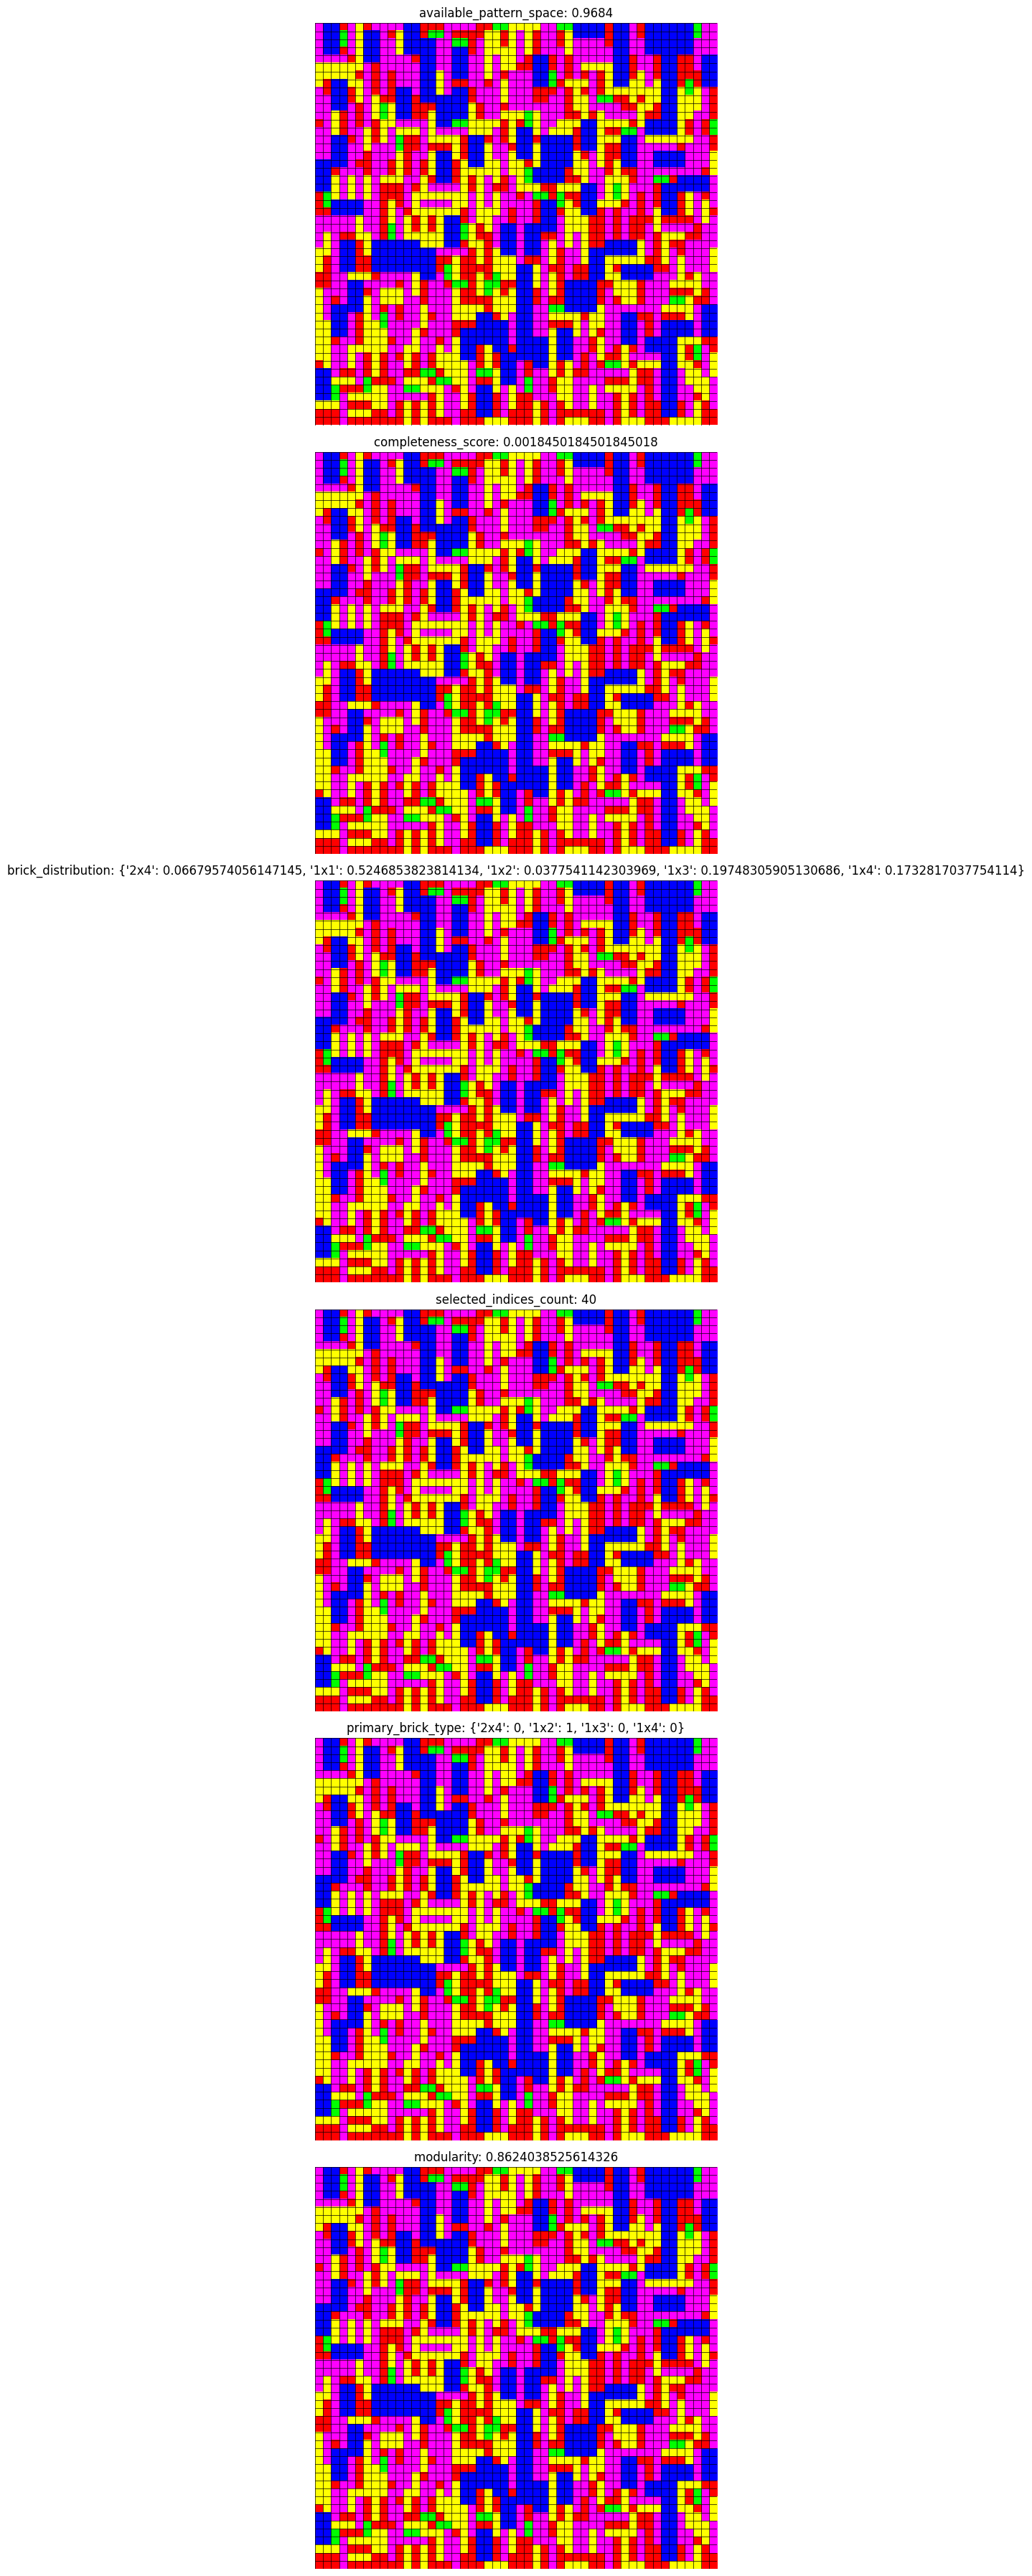

In [ ]:
# Cell 3.5.2: Visualize Graph-Level Features for a Random Pattern with Matplotlib

import matplotlib.pyplot as plt
import random

def visualize_graph_features_with_matplotlib(graph_features, pattern_data, grid_width, grid_height):
    """Visualize a random pattern multiple times, each time displaying a different graph-level feature."""

    # Extract cell colors from the pattern
    cell_colors = pattern_data['cell_colors']

    # List of graph-level features to visualize
    feature_names = list(graph_features.keys())

    # Initialize a subplot figure with enough rows to display each feature
    fig, axs = plt.subplots(len(feature_names), 1, figsize=(6, len(feature_names) * 6))

    # Loop over each feature and plot the pattern with the feature value in the title
    for i, feature_name in enumerate(feature_names):
        ax = axs[i]

        # Create an empty grid for visualization
        grid_image = np.ones((grid_height, grid_width, 3)) * 255  # White background

        # Fill in the cell colors for the specific pattern
        for idx, color in enumerate(cell_colors):
            row = idx // grid_width
            col = idx % grid_width
            if color:
                grid_image[row, col] = color

        # Display the grid
        ax.imshow(grid_image.astype(np.uint8), extent=(0, grid_width, grid_height, 0))

        # Add grid lines
        for j in range(grid_width + 1):
            ax.plot([j, j], [0, grid_height], color='black', lw=0.5)
        for j in range(grid_height + 1):
            ax.plot([0, grid_width], [j, j], color='black', lw=0.5)

        # Set the title with the graph feature's value
        feature_value = graph_features[feature_name]
        ax.set_title(f"{feature_name}: {feature_value}")

        # Hide axis labels
        ax.axis('off')

    # Show the entire plot
    plt.tight_layout()
    plt.show()

# Example: Visualize graph-level features for one random pattern
random_pattern = random.choice(patterns_dataset)
print(f"\n--- Visualizing Graph Features for Pattern ID: {random_pattern['iteration_id']} ---")

pattern_graph = convert_pattern_to_graph(empty_grid_graph, random_pattern)
subgraph_features, incomplete_subgraph_count = extract_subgraph_features(pattern_graph, random_pattern)
graph_features = extract_graph_level_features(random_pattern, pattern_graph)

# Visualize the graph-level features for the random pattern
visualize_graph_features_with_matplotlib(graph_features, random_pattern, grid_width, grid_height)


# Step 4: Feature Engineering

## Step 4.1: Feature Normalization/Scalarization

Node-Level Features:

    brick_type: One-hot encoded, no need to scalarize.
    orientation: One-hot encoded, no need to scalarize.
    occupied: Binary, no need to scalarize.
    insertion_point: Binary, no need to scalarize.
    filler_module: Binary, no need to scalarize.
    eigenvector_centrality: Already normalized (0 to 1), no need to scalarize.
    x_pos, y_pos: Need to be scalarized.

Edge-Level Features:

    connectivity: Binary, no need to scalarize.
    orientation_match: Binary, no need to scalarize.

Subgraph-Level Features:

    brick_type: Already one-hot encoded, no need to scalarize.
    num_cells: This represents the size of the brick. We should scalarize it, as the number of cells could vary significantly across different subgraphs.
    orientation: One-hot encoded, no need to scalarize.
    completeness: Binary, no need to scalarize.

Graph-Level Features:

    available_pattern_space: Already a ratio (0 to 1), no need to scalarize.
    completeness_score: Integer, should be scalarized since it can vary across patterns.
    brick_distribution: Already a proportion (0 to 1), no need to scalarize.
    selected_indices_count: Integer, should be scalarized to normalize across patterns with varying numbers of insertion points.
    primary_brick_type: One-hot encoded, no need to scalarize.
    modularity: Already normalized between 0 and 1, no need to scalarize.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from joblib import Parallel, delayed

# Initialize scalers
scaler = MinMaxScaler()

# Placeholder to collect graph-level features for min-max calculation
all_graph_features = []

# Placeholder dictionaries to accumulate combined features for all patterns
combined_node_features = {}
combined_edge_features = {}
combined_subgraph_features = {}
combined_graph_features = {}

# Function to normalize node-level features
def normalize_node_features(node_features):
    """Normalize node-level features carefully."""
    node_df = pd.DataFrame(node_features)

    # Scalarize the following features:
    # - x_pos and y_pos (relative positions on the grid)
    node_df[['x_pos', 'y_pos']] = scaler.fit_transform(node_df[['x_pos', 'y_pos']])

    # Keep the following as is:
    # - brick_type (one-hot encoded)
    # - orientation (one-hot encoded)
    # - occupied (binary)
    # - insertion_point (binary)
    # - filler_module (binary)
    # - eigenvector_centrality (already between 0 and 1)

    return node_df

# Function to normalize edge-level features (no need to scale here)
def normalize_edge_features(edge_features):
    """Normalize edge-level features (if necessary)."""
    edge_df = pd.DataFrame(edge_features)
    # No features to scalarize here
    return edge_df

# Function to normalize subgraph-level features
def normalize_subgraph_features(subgraph_features):
    """Normalize subgraph-level features carefully."""
    subgraph_df = pd.DataFrame(subgraph_features)

    # Scalarize the following feature:
    # - num_cells (number of cells occupied by the subgraph/brick)
    subgraph_df[['num_cells']] = scaler.fit_transform(subgraph_df[['num_cells']])

    # Convert orientation to binary encoding (0 for horizontal, 1 for vertical)
    subgraph_df['orientation'] = subgraph_df['orientation'].apply(lambda x: 0 if x == 'horizontal' else 1)

    # Keep the following as is:
    # - brick_type (categorical, no need to normalize)
    # - completeness (binary)

    return subgraph_df

# Function to collect graph-level features for min-max scalarization
def collect_graph_level_features(graph_features):
    """Collect graph-level features to compute min and max for scalarization."""
    all_graph_features.append(graph_features)

# Function to normalize graph-level features using global min-max values
def normalize_graph_features_with_global_min_max(graph_features, global_scaler):
    """Normalize graph-level features carefully using global min-max values."""
    graph_df = pd.DataFrame([graph_features])

    # Scalarize the following features using the global scaler:
    # - completeness_score
    # - available_pattern_space
    # - modularity
    graph_df[['completeness_score', 'available_pattern_space', 'modularity']] = global_scaler.transform(
        graph_df[['completeness_score', 'available_pattern_space', 'modularity']]
    )

    # Keep the following as is:
    # - selected_indices_count (integer, no need to scalarize)
    # - brick_distribution (vector proportions, no need to normalize)
    # - primary_brick_type (one-hot encoded)

    return graph_df

# Function to process one pattern's features and return the results
def process_pattern_features(pattern_id, pattern, global_scaler):
    print(f"\n--- Processing Features for Pattern ID: {pattern['iteration_id']} ---")

    pattern_graph = convert_pattern_to_graph(empty_grid_graph, pattern)

    # Node features
    node_features = extract_node_features_for_pattern(pattern_graph, pattern)
    normalized_node_df = normalize_node_features(node_features)

    # Edge features
    edge_features = extract_edge_features(pattern_graph)
    normalized_edge_df = normalize_edge_features(edge_features)

    # Subgraph features
    subgraph_features, _ = extract_subgraph_features(pattern_graph, pattern)
    normalized_subgraph_df = normalize_subgraph_features(subgraph_features)

    # Graph features
    graph_features = extract_graph_level_features(pattern, pattern_graph)
    normalized_graph_df = normalize_graph_features_with_global_min_max(graph_features, global_scaler)

    # Return the normalized features for the current pattern
    return {
        'pattern_id': pattern_id,
        'node_features': normalized_node_df,
        'edge_features': normalized_edge_df,
        'subgraph_features': normalized_subgraph_df,
        'graph_features': normalized_graph_df
    }

# Step 1: First pass through patterns to collect all graph-level features
for pattern_id, pattern in enumerate(patterns_dataset):
    print(f"\n--- Collecting Graph-Level Features for Pattern ID: {pattern['iteration_id']} ---")

    # Extract graph features
    pattern_graph = convert_pattern_to_graph(empty_grid_graph, pattern)
    graph_features = extract_graph_level_features(pattern, pattern_graph)
    collect_graph_level_features(graph_features)

# Step 2: Calculate global min and max values for completeness_score, available_pattern_space, and modularity
all_graph_df = pd.DataFrame(all_graph_features)
global_scaler = MinMaxScaler()
global_scaler.fit(all_graph_df[['completeness_score', 'available_pattern_space', 'modularity']])

# Step 3: Normalize features for each pattern using global min-max values in parallel
results = Parallel(n_jobs=-1)(delayed(process_pattern_features)(pattern_id, pattern, global_scaler) for pattern_id, pattern in enumerate(patterns_dataset))

# Step 4: Collect results from the parallel processing
for result in results:
    pattern_id = result['pattern_id']
    combined_node_features[pattern_id] = result['node_features']
    combined_edge_features[pattern_id] = result['edge_features']
    combined_subgraph_features[pattern_id] = result['subgraph_features']
    combined_graph_features[pattern_id] = result['graph_features']

# Print a sample of the final normalized features
print("\nSample Node Features from Last Pattern:")
print(combined_node_features[max(combined_node_features.keys())].head())
print("\nSample Edge Features from Last Pattern:")
print(combined_edge_features[max(combined_edge_features.keys())].head())
print("\nSample Subgraph Features from Last Pattern:")
print(combined_subgraph_features[max(combined_subgraph_features.keys())].head())
print("\nSample Graph Features from Last Pattern:")
print(combined_graph_features[max(combined_graph_features.keys())].head())



--- Collecting Graph-Level Features for Pattern ID: 0 ---

--- Collecting Graph-Level Features for Pattern ID: 1 ---

--- Collecting Graph-Level Features for Pattern ID: 2 ---

--- Collecting Graph-Level Features for Pattern ID: 3 ---

--- Collecting Graph-Level Features for Pattern ID: 4 ---

--- Collecting Graph-Level Features for Pattern ID: 5 ---

--- Collecting Graph-Level Features for Pattern ID: 6 ---

--- Collecting Graph-Level Features for Pattern ID: 7 ---

--- Collecting Graph-Level Features for Pattern ID: 8 ---

--- Collecting Graph-Level Features for Pattern ID: 9 ---

Sample Node Features from Last Pattern:
   node_id       brick_type     x_pos  y_pos orientation  occupied  \
0        0  [0, 0, 0, 0, 1]  0.000000    0.0      [1, 0]         1   
1        1  [0, 1, 0, 0, 0]  0.020408    0.0      [1, 0]         1   
2        2  [0, 0, 1, 0, 0]  0.040816    0.0      [1, 0]         1   
3        3  [0, 0, 0, 1, 0]  0.061224    0.0      [1, 0]         1   
4        4  [0, 0, 

# Step 5: Export All Features and Graphs (Including DGL Graphs)

## Step 5.1: Convert Empty Grid Graph to DGL

In [ ]:
import dgl
import torch
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming we are reusing the scaler from 4.1 for consistency in x and y position scaling
scaler = MinMaxScaler()

# Create the empty grid node features for normalization
def create_empty_grid_node_features(empty_grid_graph):
    """Create default node features for the empty grid graph and normalize necessary fields."""
    node_features = []
    node_positions = nx.get_node_attributes(empty_grid_graph, 'pos')

    for node_id, pos in node_positions.items():
        node_feature = {
            'node_id': node_id,
            'x_pos': pos[0],  # Default x position
            'y_pos': pos[1],  # Default y position
            'brick_type': [0, 0, 0, 0, 0],  # No brick assigned
            'orientation': [1, 0],  # Default to horizontal
            'occupied': 0,  # No node is occupied yet
            'insertion_point': 0,  # No insertion point
            'filler_module': 0,  # Not a filler module
            'eigenvector_centrality': 0  # Centrality will be 0 by default for empty graph
        }
        node_features.append(node_feature)

    node_df = pd.DataFrame(node_features)

    # Normalize x_pos and y_pos (consistent with the pattern graphs)
    node_df[['x_pos', 'y_pos']] = scaler.fit_transform(node_df[['x_pos', 'y_pos']])

    return node_df

# Convert NetworkX graph and node features to DGL with normalized x_pos, y_pos
def convert_to_dgl_graph_with_normalization(G, node_features_df):
    """Convert a NetworkX graph and node features dataframe into a DGL graph."""
    dgl_graph = dgl.from_networkx(G)

    # Prepare the node features in tensor format from the dataframe
    x_pos = torch.tensor(node_features_df['x_pos'].values, dtype=torch.float32).unsqueeze(1)
    y_pos = torch.tensor(node_features_df['y_pos'].values, dtype=torch.float32).unsqueeze(1)
    brick_type = torch.tensor(node_features_df['brick_type'].tolist(), dtype=torch.float32)
    orientation = torch.tensor(node_features_df['orientation'].tolist(), dtype=torch.float32)
    occupied = torch.tensor(node_features_df['occupied'].values, dtype=torch.float32).unsqueeze(1)
    insertion_point = torch.tensor(node_features_df['insertion_point'].values, dtype=torch.float32).unsqueeze(1)
    filler_module = torch.tensor(node_features_df['filler_module'].values, dtype=torch.float32).unsqueeze(1)
    eigenvector_centrality = torch.tensor(node_features_df['eigenvector_centrality'].values, dtype=torch.float32).unsqueeze(1)

    # Concatenate all node-level features
    node_feature_matrix = torch.cat(
        [x_pos, y_pos, brick_type, orientation, occupied, insertion_point, filler_module, eigenvector_centrality], dim=1
    )

    # Assign node features to the DGL graph
    dgl_graph.ndata['features'] = node_feature_matrix

    return dgl_graph

# Step 1: Create the empty grid node features
empty_grid_node_features_df = create_empty_grid_node_features(empty_grid_graph)

# Step 2: Convert the empty grid graph to DGL
empty_grid_dgl_graph = convert_to_dgl_graph_with_normalization(empty_grid_graph, empty_grid_node_features_df)

# Print some info about the empty grid DGL graph
print(f"Empty DGL Graph - Number of Nodes: {empty_grid_dgl_graph.num_nodes()}")
print(f"Empty DGL Graph - Number of Edges: {empty_grid_dgl_graph.num_edges()}")


## 5.2: Convert All Pattern Graphs to DGL

In [ ]:
import os
import pickle
import dgl

# Path where DGL graphs will be saved
dgl_save_path = "/content/drive/MyDrive/BrickLayerX_50_5000/DGLGraphs/"
os.makedirs(dgl_save_path, exist_ok=True)

# Function to convert all pattern graphs to DGL and save
def convert_and_save_all_pattern_dgl_graphs():
    all_pattern_dgl_graphs = {}  # Dictionary to store all DGL graphs

    for pattern_id, pattern in enumerate(patterns_dataset):
        print(f"Processing Pattern ID: {pattern_id}")

        # Convert the pattern graph to DGL (no need for node/edge feature embeddings at this stage)
        pattern_graph = convert_pattern_to_graph(empty_grid_graph, pattern)  # Convert the graph structure

        # Convert the raw pattern graph to DGL without embedding node/edge features
        pattern_dgl_graph = dgl.from_networkx(pattern_graph)  # Raw DGL graph

        # Add metadata from patterns_dataset (iteration_id, primary_brick_type, etc.)
        pattern_dgl_graph.gdata = {
            'iteration_id': pattern['iteration_id'],
            'primary_brick_type': pattern['primary_brick_type'],
            'selected_insertion_points': pattern['selected_insertion_points']
        }

        # Store each pattern's DGL graph in a dictionary
        all_pattern_dgl_graphs[pattern_id] = pattern_dgl_graph

    # Save all DGL graphs as a single pickle file
    dgl_graphs_file = os.path.join(dgl_save_path, 'all_pattern_dgl_graphs.pkl')
    with open(dgl_graphs_file, 'wb') as f:
        pickle.dump(all_pattern_dgl_graphs, f)

    print("All pattern DGL graphs have been converted and saved successfully.")

# Call the function after Step 4.1 is complete
convert_and_save_all_pattern_dgl_graphs()


## Step 5.3: Saving Sclarized/Normalized Features as pickl

all_pattern_dgl_graphs.pkl – Contains all pattern graphs.
empty_grid_dgl_graph.pkl – Contains the DGL-converted empty grid graph.
combined_node_features.pkl – Contains node-level features.
combined_edge_features.pkl – Contains edge-level features.
combined_subgraph_features.pkl – Contains subgraph-level features.
combined_graph_features.pkl – Contains graph-level features.
patterns_dataset.pkl – Contains metadata like iteration ID, etc.

In [ ]:
import os
import pickle
import dgl

# Base save path
save_path = "/content/drive/MyDrive/BrickLayerX_50_5000/"
os.makedirs(save_path, exist_ok=True)

# Ensure that we have the normalized feature collections
# These variables should be collected during the normalization step in Step 4.1
if 'combined_node_features' not in globals():
    combined_node_features = {}
if 'combined_edge_features' not in globals():
    combined_edge_features = {}
if 'combined_subgraph_features' not in globals():
    combined_subgraph_features = {}
if 'combined_graph_features' not in globals():
    combined_graph_features = {}

# Function to save the entire project data
def save_entire_project_data():
    # 1. Save `patterns_dataset` (important for pattern metadata)
    patterns_dataset_file = os.path.join(save_path, 'patterns_dataset.pkl')
    with open(patterns_dataset_file, 'wb') as f:
        pickle.dump(patterns_dataset, f)
    print("Patterns dataset saved.")

    # 2. Save all pattern DGL graphs (converted in Step 5.2)
    dgl_graphs_file = os.path.join(save_path, 'all_pattern_dgl_graphs.pkl')
    if not os.path.exists(dgl_graphs_file):
        convert_and_save_all_pattern_dgl_graphs()  # Ensure graphs are converted to DGL if not done
    print("Pattern DGL graphs saved or previously saved.")

    # 3. Save the empty grid graph (converted to DGL in Step 5.1)
    empty_grid_graph_file = os.path.join(save_path, 'empty_grid_dgl_graph.pkl')
    with open(empty_grid_graph_file, 'wb') as f:
        pickle.dump(empty_grid_dgl_graph, f)
    print("Empty grid graph saved.")

    # 4. Save the combined normalized features from Step 4.1
    combined_features_save_path = os.path.join(save_path, 'combined_normalized_features.pkl')

    # Collect all normalized features into a dictionary
    all_normalized_features = {
        'node_features': combined_node_features,       # Normalized node features
        'edge_features': combined_edge_features,       # Normalized edge features
        'subgraph_features': combined_subgraph_features, # Normalized subgraph features
        'graph_features': combined_graph_features      # Normalized graph features
    }

    with open(combined_features_save_path, 'wb') as f:
        pickle.dump(all_normalized_features, f)
    print("Combined normalized features saved.")

# Call the save function to store the entire dataset and features
save_entire_project_data()
